<a href="https://colab.research.google.com/github/Laibasif/Biopython_Projects/blob/main/Phylogenetics_Analysis_0f_giantviruses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.1 MB/s eta 0:00:00


In [22]:
from google.colab import files
uploaded = files.upload()  # Opens a file upload prompt


Saving 12985_2018_976_MOESM2_ESM.csv to 12985_2018_976_MOESM2_ESM.csv


In [24]:
import pandas as pd

file_path = "12985_2018_976_MOESM2_ESM.csv"  # The uploaded file
df = pd.read_csv(file_path, encoding="utf-8")
print("CSV file loaded successfully!")
print(df)  # Display first 5 rows


CSV file loaded successfully!
                                        Query Seq-id  \
0  AUZX01005870.1_Mine_drainage_metagenome_contig...   
1  AUZX01007984.1_Mine_drainage_metagenome_contig...   
2  AUZX01014511.1_Mine_drainage_metagenome_contig...   
3  AUZX01014088.1_Mine_drainage_metagenome_contig...   
4  AUZX01005811.1_Mine_drainage_metagenome_contig...   
5  AUZY01012469.1_Mine_drainage_metagenome_contig...   
6  AUZY01012943.1_Mine_drainage_metagenome_contig...   
7  AUZX01011676.1_Mine_drainage_metagenome_contig...   
8  AUZY01013064.1_Mine_drainage_metagenome_contig...   
9  AUZY01002937.1_Mine_drainage_metagenome_contig...   

                      Subject Seq-id  \
0        gi|823719021|gb|AKI80625.1|   
1        gi|823718128|gb|AKI79732.1|   
2  gi|1115260659|ref|YP_009328946.1|   
3  gi|1115261081|ref|YP_009329368.1|   
4   gi|589287939|ref|YP_009010603.1|   
5                                NaN   
6   gi|585299451|ref|YP_009001024.1|   
7                                

In [27]:
import pandas as pd

# Replace 'your_file.csv' with the uploaded file name
file_name = "12985_2018_976_MOESM2_ESM.csv"  # Change this to match your file name
df = pd.read_csv(file_name, encoding="utf-8")

# Display dataset information and first few rows
print("CSV file loaded successfully!")
print(df.info())  # Shows column names and data types
print(df.head())  # Displays first few rows


✅ CSV file loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Query Seq-id                              10 non-null     object 
 1   Subject Seq-id                            7 non-null      object 
 2   Title                                     10 non-null     object 
 3   Group                                     10 non-null     object 
 4   Scientific name(s)                        10 non-null     object 
 5   Annotation                                10 non-null     object 
 6   Max score                                 10 non-null     float64
 7   Total score                               10 non-null     int64  
 8   Query coverage                            10 non-null     int64  
 9   E-value                                   10 non-null     float64
 10  Percentag

In [45]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd

# Load CSV file
file_name = "12985_2018_976_MOESM2_ESM.csv"  # Change this to your actual file name

# Read CSV with error handling
try:
    df = pd.read_csv(file_name, encoding="utf-8")
except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
    exit()
except Exception as e:
    print(f"Error reading file: {e}")
    exit()

# Check if required columns exist
required_columns = ["Query Seq-id", "Aligned part of query sequence", "Subject Seq-id", "Aligned part of subject sequence"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Error: Missing columns in CSV - {missing_columns}")
    exit()

# Extract relevant columns and drop NaN values
query_df = df[["Query Seq-id", "Aligned part of query sequence"]].dropna()
subject_df = df[["Subject Seq-id", "Aligned part of subject sequence"]].dropna()

# Convert IDs and sequences to strings to avoid data type issues
query_df["Query Seq-id"] = query_df["Query Seq-id"].astype(str)
query_df["Aligned part of query sequence"] = query_df["Aligned part of query sequence"].astype(str)
subject_df["Subject Seq-id"] = subject_df["Subject Seq-id"].astype(str)
subject_df["Aligned part of subject sequence"] = subject_df["Aligned part of subject sequence"].astype(str)

# Generate FASTA records
records = []

# Create records for query sequences with proper IDs
for query_id, sequence in zip(query_df["Query Seq-id"], query_df["Aligned part of query sequence"]):
    if sequence.strip():  # Ensure the sequence is not empty
        records.append(SeqRecord(Seq(sequence), id=query_id, description="Query Sequence"))

# Create records for subject sequences with proper IDs
for subject_id, sequence in zip(subject_df["Subject Seq-id"], subject_df["Aligned part of subject sequence"]):
    if sequence.strip():  # Ensure the sequence is not empty
        records.append(SeqRecord(Seq(sequence), id=subject_id, description="Subject Sequence"))

# Check if we have records before saving
if records:
    fasta_file = "sequences.fasta"
    SeqIO.write(records, fasta_file, "fasta")
    print(f"Sequences saved to {fasta_file}")
else:
    print("No valid sequences found. FASTA file not created.")


Sequences saved to sequences.fasta


In [47]:
import subprocess
from Bio.Align.Applications import ClustalOmegaCommandline

# Define input and output file names
fasta_file = "sequences.fasta"  # Your generated FASTA file
aligned_file = "aligned_sequences.fasta"  # Output file

# Run Clustal Omega for alignment with --force to overwrite the existing file
try:
    clustalomega_cline = ClustalOmegaCommandline(
        infile=fasta_file,
        outfile=aligned_file,
        seqtype="Protein",  # Change to "DNA" if needed
        verbose=True,
        auto=True,
        force=True  # Allows overwriting the existing file
    )

    stdout, stderr = clustalomega_cline()  # Execute the alignment
    print(stdout)  # Prints Clustal Omega output
    print(f"Sequences aligned and saved as {aligned_file}")

except Exception as e:
    print(f"Error running Clustal Omega: {e}")


Using 2 threads
Read 17 sequences (type: Protein) from sequences.fasta
not more sequences (17) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Using 16 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 17 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 152)
Ktuple-distance calculation progress: 3 % (6 out of 152)
Ktuple-distance calculation progress: 8 % (13 out of 152)
Ktuple-distance calculation progress: 20 % (31 out of 152)
Ktuple-distance calculation progress: 21 % (32 out of 152)
Ktuple-distance calculation progress: 28 % (44 out of 152)
Ktuple-distance calculation progress: 36 % (55 out of 152)
Ktuple-distance calculation progress: 38 % (59 out of 152)
Ktuple-distance calculation progress: 42 % (65 out of 152)
Ktuple-dist

In [51]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Define the correct tree file name
tree_file = "phylogenetic_tree.dnd"  # Update this if needed

# Check if the tree file exists before loading
if os.path.exists(tree_file):
    # Read and print the tree structure
    tree = Phylo.read(tree_file, "newick")
    print(tree)

    # Visualize the phylogenetic tree
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree)
    plt.show()

else:
    print("Error: Phylogenetic tree file not found. Check Clustal Omega output.")


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.141164)
            Clade(branch_length=0.307692, name='AUZY01012943.1_Mine_drainage_metagenome_contig09710._whol...')
            Clade(branch_length=0.307692, name='gi|585299451|ref|YP_009001024.1|')
        Clade(branch_length=0.00653985)
            Clade(branch_length=0.119335)
                Clade(name='AUZY01002937.1_Mine_drainage_metagenome_contig14672')
                Clade(branch_length=0.322981, name='_whole_genome_shotgun_sequence')
                Clade(branch_length=0.322981, name='gi|1241380653|gb|ASZ85017.1|')
            Clade(branch_length=-0.00140554)
                Clade(branch_length=0.14331)
                    Clade(branch_length=0.300412, name='AUZX01014511.1_Mine_drainage_metagenome_contig07869._whol...')
                    Clade(branch_length=0.300412, name='gi|1115260659|ref|YP_009328946.1|')
                Clade(branch_length=0.00590545)
                    Clade(branch_length=0.17

In [52]:
# Install Clustal Omega (if not installed)
!apt-get install -y clustalo

import os
import subprocess
import matplotlib.pyplot as plt
from Bio import Phylo

# Define input and output file names
fasta_file = "sequences.fasta"  # Ensure this file exists
aligned_file = "aligned_sequences.fasta"
tree_file = "phylogenetic_tree.dnd"

# Run Clustal Omega for sequence alignment and guide tree generation
try:
    clustal_command = f"clustalo -i {fasta_file} -o {aligned_file} --force --outfmt=fasta --guidetree-out={tree_file}"

    process = subprocess.run(clustal_command, shell=True, check=True, capture_output=True, text=True)

    print("Alignment and guide tree generation complete!")
    print(process.stdout)

except subprocess.CalledProcessError as e:
    print(f" Error running Clustal Omega:\n{e.stderr}")
    exit()

# Check if the phylogenetic tree file was created
if os.path.exists(tree_file):
    print("Phylogenetic tree file created successfully.")

    # Load and visualize the tree
    tree = Phylo.read(tree_file, "newick")

    plt.figure(figsize=(12, 8))
    Phylo.draw(tree)
    plt.show()

else:
    print("Error: Phylogenetic tree file not found. Check Clustal Omega output.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Alignment and guide tree generation complete!

Phylogenetic tree file created successfully.


In [53]:
import os
import matplotlib
import matplotlib.pyplot as plt
from Bio import Phylo

# Use 'Agg' for static images (no GUI in Colab)
matplotlib.use('Agg')

# Define the correct tree file name
tree_file = "phylogenetic_tree.dnd"  # Update if needed
output_image = "phylogenetic_tree.png"

# Check if the tree file exists before loading
if os.path.exists(tree_file):
    # Read and print the tree structure
    tree = Phylo.read(tree_file, "newick")
    print(tree)

    # Generate and save the phylogenetic tree visualization
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree)
    plt.savefig(output_image, dpi=300, bbox_inches='tight')  # High-quality output
    print(f"Tree saved successfully as {output_image}")

else:
    print("Error: Phylogenetic tree file not found. Check Clustal Omega output.")


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.141164)
            Clade(branch_length=0.307692, name='AUZY01012943.1_Mine_drainage_metagenome_contig09710._whol...')
            Clade(branch_length=0.307692, name='gi|585299451|ref|YP_009001024.1|')
        Clade(branch_length=0.00653985)
            Clade(branch_length=0.119335)
                Clade(name='AUZY01002937.1_Mine_drainage_metagenome_contig14672')
                Clade(branch_length=0.322981, name='_whole_genome_shotgun_sequence')
                Clade(branch_length=0.322981, name='gi|1241380653|gb|ASZ85017.1|')
            Clade(branch_length=-0.00140554)
                Clade(branch_length=0.14331)
                    Clade(branch_length=0.300412, name='AUZX01014511.1_Mine_drainage_metagenome_contig07869._whol...')
                    Clade(branch_length=0.300412, name='gi|1115260659|ref|YP_009328946.1|')
                Clade(branch_length=0.00590545)
                    Clade(branch_length=0.17

In [54]:
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from Bio import Phylo

# Define tree file
tree_file = "phylogenetic_tree.dnd"

# Check if the file exists before proceeding
if os.path.exists(tree_file):
    # Load the tree
    tree = Phylo.read(tree_file, "newick")

    # Print the ASCII representation of the tree
    print("\n🔹 ASCII Representation of the Phylogenetic Tree:\n")
    Phylo.draw_ascii(tree)

    # Function to extract nodes for Sankey diagram
    def extract_nodes(clade, parent_name=None):
        nodes = []
        if clade.name:
            nodes.append((clade.name, parent_name))
        for subclade in clade.clades:
            nodes.extend(extract_nodes(subclade, clade.name if clade.name else parent_name))
        return nodes

    nodes = extract_nodes(tree.root)

    # Ensure there are no missing values
    nodes = [(n, p) for n, p in nodes if n is not None and p is not None]

    # Create Sankey diagram
    if nodes:
        fig = go.Figure(go.Sankey(
            node=dict(
                label=[n[0] for n in nodes],  # Node labels
                color="lightblue"
            ),
            link=dict(
                source=[nodes.index((p, n)) for n, p in nodes if p],  # Parent indices
                target=[nodes.index((n, p)) for n, p in nodes if p]   # Child indices
            )
        ))

        fig.update_layout(title="Phylogenetic Tree (Sankey Diagram)", font=dict(size=12))
        fig.show()
    else:
        print("No valid nodes found for Sankey diagram.")

else:
    print("Error: Phylogenetic tree file not found. Check Clustal Omega output.")



🔹 ASCII Representation of the Phylogenetic Tree:

            ______________________ AUZY01012943.1_Mine_drainage_metageno...
  _________|
 |         |______________________ gi|585299451|ref|YP_009001024.1|
 |
 |        , AUZY01002937.1_Mine_drainage_metageno...
_|        |
 |________|_______________________ _whole_genome_shotgun_sequence
 |        |
 |        |_______________________ gi|1241380653|gb|ASZ85017.1|
 |
 |           _____________________ AUZX01014511.1_Mine_drainage_metageno...
 |__________|
 |          |_____________________ gi|1115260659|ref|YP_009328946.1|
 |
 |              ___________________ AUZX01014088.1_Mine_drainage_metageno...
 |_____________|
 |             |___________________ gi|1115261081|ref|YP_009329368.1|
 |
 |      __________________________ AUZX01005811.1_Mine_drainage_metageno...
 |_____|
 |     |__________________________ gi|589287939|ref|YP_009010603.1|
 |
 |________________________________ AUZX01011676.1_Mine_drainage_metageno...
 |
 | ____________

In [56]:
import os
import matplotlib
import matplotlib.pyplot as plt
from Bio import Phylo

# Use 'Agg' for static images (no GUI in Colab)
matplotlib.use('Agg')

# Define the correct tree file name
tree_file = "phylogenetic_tree.dnd"  # Update if needed
output_image = "phylogenetic_tree.png"

# Check if the tree file exists before loading
if os.path.exists(tree_file):
    # Read and print the tree structure
    tree = Phylo.read(tree_file, "newick")
    print(tree)

    # Generate and save the phylogenetic tree visualization
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree)
    plt.savefig(output_image, dpi=300, bbox_inches='tight')  # High-quality output
    print(f"✅ Tree saved successfully as {output_image}")

else:
    print("❌ Error: Phylogenetic tree file not found. Check Clustal Omega output.")


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.141164)
            Clade(branch_length=0.307692, name='AUZY01012943.1_Mine_drainage_metagenome_contig09710._whol...')
            Clade(branch_length=0.307692, name='gi|585299451|ref|YP_009001024.1|')
        Clade(branch_length=0.00653985)
            Clade(branch_length=0.119335)
                Clade(name='AUZY01002937.1_Mine_drainage_metagenome_contig14672')
                Clade(branch_length=0.322981, name='_whole_genome_shotgun_sequence')
                Clade(branch_length=0.322981, name='gi|1241380653|gb|ASZ85017.1|')
            Clade(branch_length=-0.00140554)
                Clade(branch_length=0.14331)
                    Clade(branch_length=0.300412, name='AUZX01014511.1_Mine_drainage_metagenome_contig07869._whol...')
                    Clade(branch_length=0.300412, name='gi|1115260659|ref|YP_009328946.1|')
                Clade(branch_length=0.00590545)
                    Clade(branch_length=0.17

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
file_path = '12985_2018_976_MOESM2_ESM.csv'  # Ensure this file exists in your working directory
df = pd.read_csv(file_path, encoding='utf-8')

# Step 2: Data Overview
print(df.info())  # Get dataset summary
print(df.head())  # Preview first 5 rows

# Step 3: Check for Missing Values and Duplicates
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Samples:", df.duplicated().sum())

# Step 4: Analyze Query and Subject Sequence Distribution (if applicable)
plt.figure(figsize=(12, 6))
sns.countplot(y='Query Seq-id', data=df, order=df['Query Seq-id'].value_counts().index, palette='viridis')
plt.title('Distribution of Query Sequences')
plt.xlabel('Count')
plt.ylabel('Query Seq-id')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='Subject Seq-id', data=df, order=df['Subject Seq-id'].value_counts().index, palette='mako')
plt.title('Distribution of Subject Sequences')
plt.xlabel('Count')
plt.ylabel('Subject Seq-id')
plt.show()

# Step 5: Analyze GenBank Records (if applicable)
if 'GenBank_Accession' in df.columns:
    print("\nGenBank Accessions Available:", df['GenBank_Accession'].notnull().sum())

# Step 6: Analyze Sequence Lengths (if sequences are present)
if 'Aligned part of query sequence' in df.columns:
    df['Query_Seq_Length'] = df['Aligned part of query sequence'].apply(lambda x: len(str(x)))
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Query_Seq_Length'], bins=30, kde=True, color='blue')
    plt.title('Query Sequence Length Distribution')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.show()

if 'Aligned part of subject sequence' in df.columns:
    df['Subject_Seq_Length'] = df['Aligned part of subject sequence'].apply(lambda x: len(str(x)))
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Subject_Seq_Length'], bins=30, kde=True, color='red')
    plt.title('Subject Sequence Length Distribution')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Query Seq-id                              10 non-null     object 
 1   Subject Seq-id                            7 non-null      object 
 2   Title                                     10 non-null     object 
 3   Group                                     10 non-null     object 
 4   Scientific name(s)                        10 non-null     object 
 5   Annotation                                10 non-null     object 
 6   Max score                                 10 non-null     float64
 7   Total score                               10 non-null     int64  
 8   Query coverage                            10 non-null     int64  
 9   E-value                                   10 non-null     float64
 10  Percentage of identical matches          

<ipython-input-57-dff03ac8b79f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Query Seq-id', data=df, order=df['Query Seq-id'].value_counts().index, palette='viridis')
<ipython-input-57-dff03ac8b79f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Subject Seq-id', data=df, order=df['Subject Seq-id'].value_counts().index, palette='mako')
<ipython-input-57-dff03ac8b79f>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.clos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Query Seq-id                              10 non-null     object 
 1   Subject Seq-id                            7 non-null      object 
 2   Title                                     10 non-null     object 
 3   Group                                     10 non-null     object 
 4   Scientific name(s)                        10 non-null     object 
 5   Annotation                                10 non-null     object 
 6   Max score                                 10 non-null     float64
 7   Total score                               10 non-null     int64  
 8   Query coverage                            10 non-null     int64  
 9   E-value                                   10 non-null     float64
 10  Percentage of identical matches          

<ipython-input-61-4ac646f11c36>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Query Seq-id"], order=df["Query Seq-id"].value_counts().index, palette="viridis")


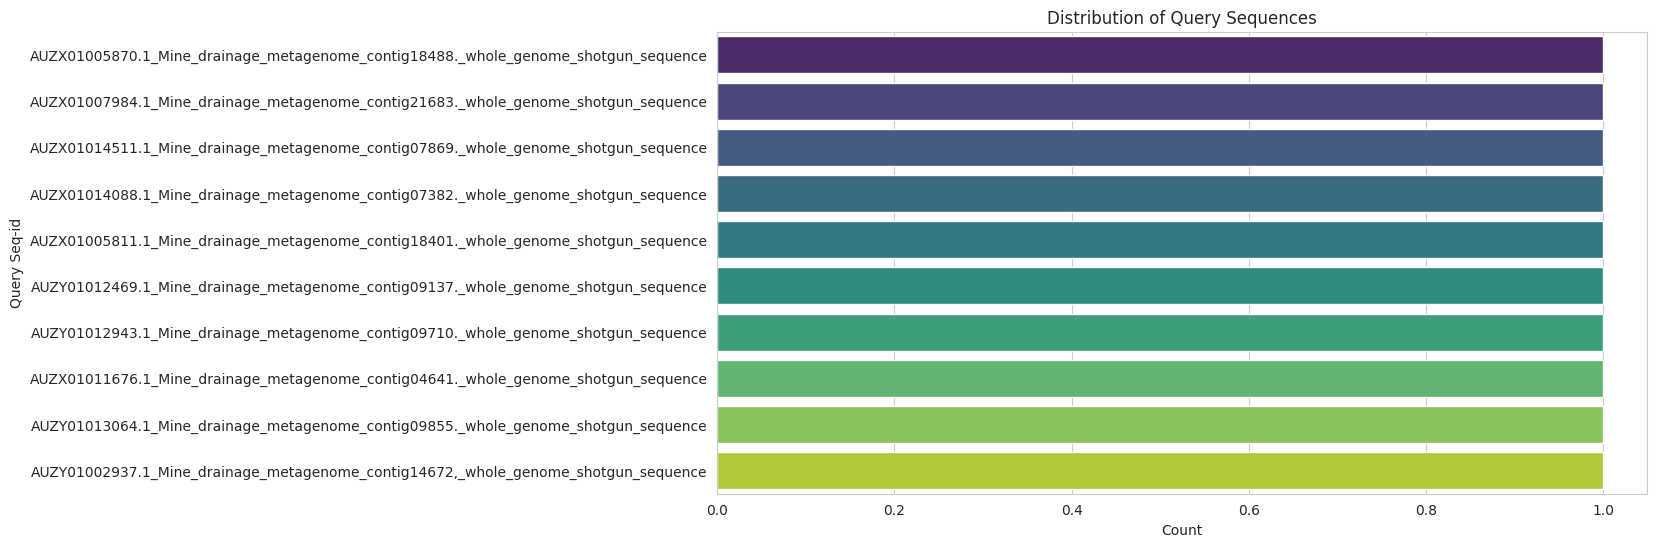

<ipython-input-61-4ac646f11c36>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Subject Seq-id"], order=df["Subject Seq-id"].value_counts().index, palette="mako")


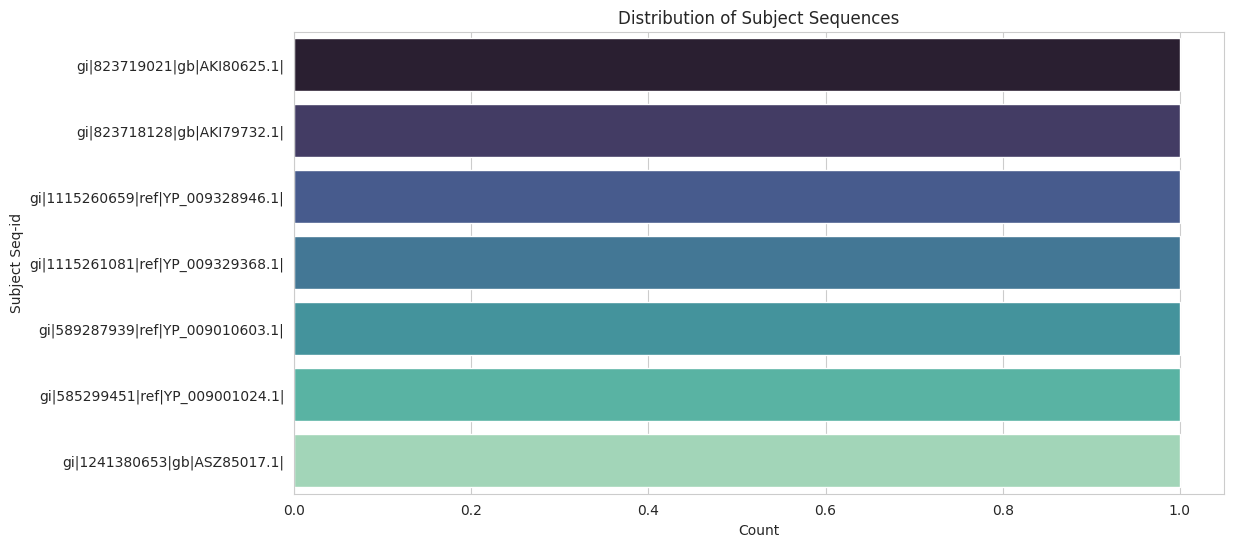


Column 'GenBank_Accession' not found in dataset.


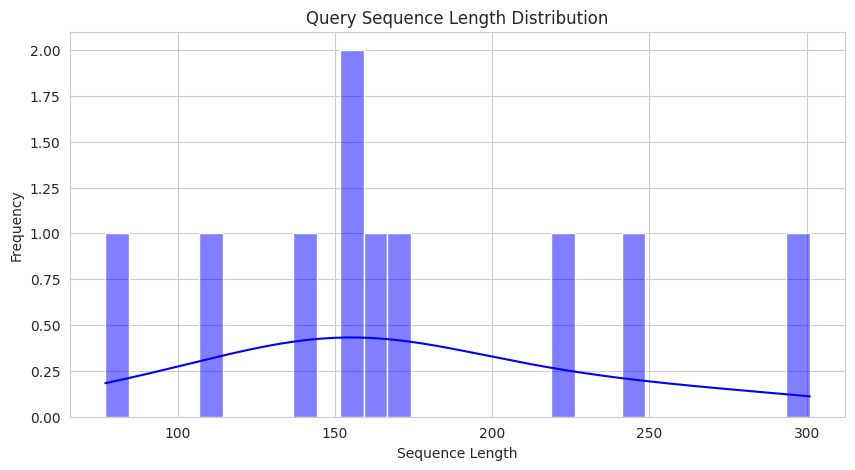

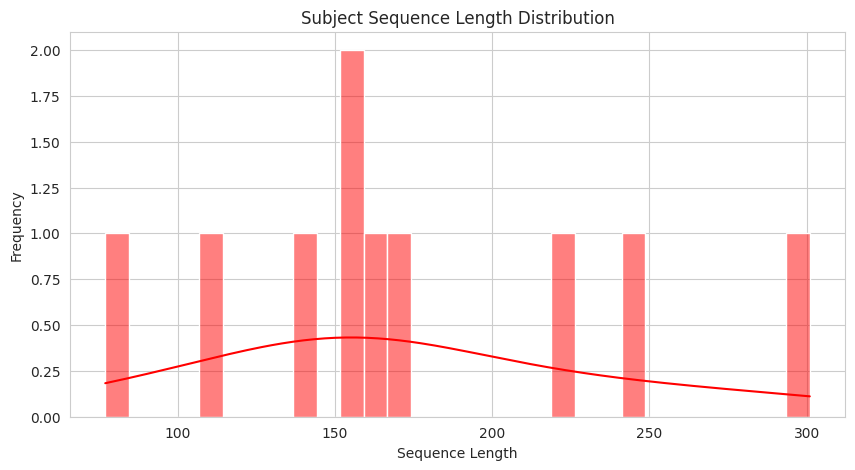

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
file_path = "12985_2018_976_MOESM2_ESM.csv"  # Ensure the file exists in your working directory
df = pd.read_csv(file_path, encoding="utf-8")

# Step 2: Data Overview
print(df.info())  # Get dataset summary
print(df.head())  # Preview first 5 rows

# Step 3: Check for Missing Values and Duplicates
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Samples:", df.duplicated().sum())

# Step 4: Analyze Query and Subject Sequence Distribution (if applicable)
if "Query Seq-id" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df["Query Seq-id"], order=df["Query Seq-id"].value_counts().index, palette="viridis")
    plt.title("Distribution of Query Sequences")
    plt.xlabel("Count")
    plt.ylabel("Query Seq-id")
    plt.show()
else:
    print("\nColumn 'Query Seq-id' not found in dataset.")

if "Subject Seq-id" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df["Subject Seq-id"], order=df["Subject Seq-id"].value_counts().index, palette="mako")
    plt.title("Distribution of Subject Sequences")
    plt.xlabel("Count")
    plt.ylabel("Subject Seq-id")
    plt.show()
else:
    print("\nColumn 'Subject Seq-id' not found in dataset.")

# Step 5: Analyze GenBank Records (if applicable)
if "GenBank_Accession" in df.columns:
    print("\nGenBank Accessions Available:", df["GenBank_Accession"].notnull().sum())
else:
    print("\nColumn 'GenBank_Accession' not found in dataset.")

# Step 6: Analyze Sequence Lengths (if sequences are present)
if "Aligned part of query sequence" in df.columns:
    df["Query_Seq_Length"] = df["Aligned part of query sequence"].dropna().apply(lambda x: len(str(x)))
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Query_Seq_Length"], bins=30, kde=True, color="blue")
    plt.title("Query Sequence Length Distribution")
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("\nColumn 'Aligned part of query sequence' not found in dataset.")

if "Aligned part of subject sequence" in df.columns:
    df["Subject_Seq_Length"] = df["Aligned part of subject sequence"].dropna().apply(lambda x: len(str(x)))
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Subject_Seq_Length"], bins=30, kde=True, color="red")
    plt.title("Subject Sequence Length Distribution")
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("\nColumn 'Aligned part of subject sequence' not found in dataset.")



Saved 10 sequences to sequences.fasta.

Phylogenetic tree generated successfully.


<Figure size 1200x800 with 0 Axes>

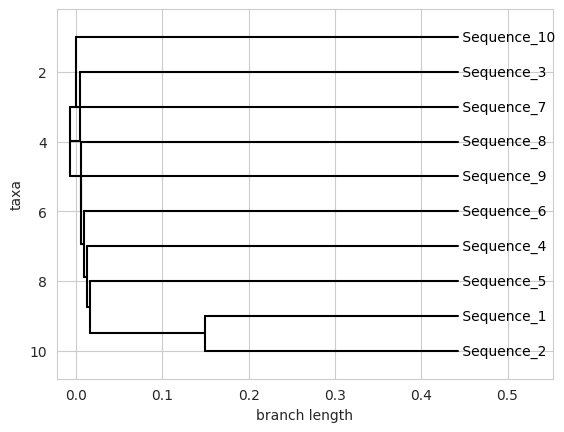

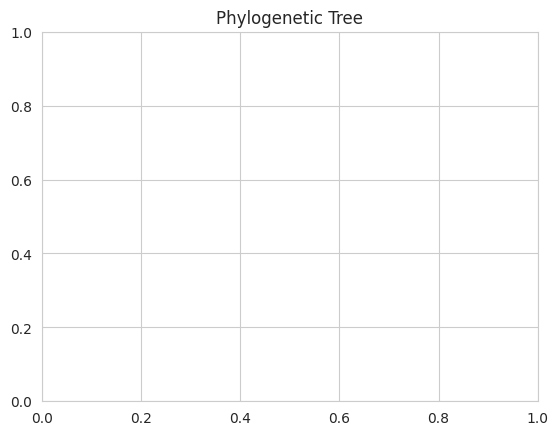

In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Phylo

# Step 1: Load the dataset
file_path = "12985_2018_976_MOESM2_ESM.csv"  # Ensure this file exists in your directory
df = pd.read_csv(file_path, encoding="utf-8")

# Step 2: Extract sequence data
if "Aligned part of query sequence" in df.columns:
    sequences = df["Aligned part of query sequence"].dropna().unique()
else:
    raise ValueError("Column 'Aligned part of query sequence' not found in dataset.")

# Step 3: Write sequences to a FASTA file
fasta_file = "sequences.fasta"
with open(fasta_file, "w") as f:
    for i, seq in enumerate(sequences):
        f.write(f">Sequence_{i+1}\n{seq}\n")

print(f"\nSaved {len(sequences)} sequences to {fasta_file}.")

# Step 4: Define output files
aligned_file = "aligned_sequences.fasta"
tree_file = "phylogenetic_tree.dnd"

# Step 5: Run Clustal Omega to align sequences and generate a tree
os.system(f"clustalo -i {fasta_file} -o {aligned_file} --force --outfmt=fasta --guidetree-out={tree_file}")

# Step 6: Check if tree file was generated
if os.path.exists(tree_file):
    print("\nPhylogenetic tree generated successfully.")

    # Step 7: Load and visualize the tree
    tree = Phylo.read(tree_file, "newick")
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree)
    plt.title("Phylogenetic Tree")
    plt.show()

else:
    print("\nError: Phylogenetic tree file not found. Check Clustal Omega output.")



In [66]:
# Install necessary libraries if not already installed
!pip install biopython plotly

# Import required libraries
import pandas as pd
from Bio import Entrez, SeqIO, Phylo
import matplotlib.pyplot as plt
from io import StringIO
import plotly.graph_objects as go

# Step 1: Load the dataset
file_path = "12985_2018_976_MOESM2_ESM.csv"  # Make sure this file exists in your working directory
df = pd.read_csv(file_path, encoding="utf-8")

# Step 2: Display dataset info
print(df.info())
print(df.head())

# Step 3: Filter rows with valid GenBank Accession numbers
if "GenBank_Accession" in df.columns:
    genbank_data = df.dropna(subset=["GenBank_Accession"])
    print("\nFiltered GenBank records:\n", genbank_data[["Scientific_Name", "GenBank_Accession"]])
else:
    raise ValueError("Column 'GenBank_Accession' not found in dataset.")

# Step 4: Fetch sequences from GenBank
Entrez.email = "laibasif99@gmail.com"  # Replace with your actual email for GenBank access
sequences = []

for accession in genbank_data["GenBank_Accession"].unique():
    try:
        handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
        seq_record = SeqIO.read(handle, "fasta")
        sequences.append(seq_record)
    except Exception as e:
        print(f"Error fetching {accession}: {e}")

# Step 5: Write sequences to a FASTA file
fasta_file = "sequences.fasta"
with open(fasta_file, "w") as f:
    SeqIO.write(sequences, f, "fasta")

print(f"\nSaved {len(sequences)} sequences to {fasta_file}.")

# Step 6: Generate a simple phylogenetic tree (Mock tree for visualization)
tree_data = "((A,B),(C,D));"  # Replace with actual tree data if available
tree = Phylo.read(StringIO(tree_data), "newick")

# Step 7: Visualize the tree
plt.figure(figsize=(10, 6))
Phylo.draw(tree)
plt.title("Phylogenetic Tree")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Query Seq-id                              10 non-null     object 
 1   Subject Seq-id                            7 non-null      object 
 2   Title                                     10 non-null     object 
 3   Group                                     10 non-null     object 
 4   Scientific name(s)                        10 non-null     object 
 5   Annotation                                10 non-null     object 
 6   Max score                                 10 non-null     float64
 7   Total score                               10 non-null     int64  
 8   Query coverage                            10 non-null     int64  
 9   E-value                                   10 non-null     float64
 10  Percentage of identical matches          

ValueError: Column 'GenBank_Accession' not found in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Query Seq-id                              10 non-null     object 
 1   Subject Seq-id                            7 non-null      object 
 2   Title                                     10 non-null     object 
 3   Group                                     10 non-null     object 
 4   Scientific name(s)                        10 non-null     object 
 5   Annotation                                10 non-null     object 
 6   Max score                                 10 non-null     float64
 7   Total score                               10 non-null     int64  
 8   Query coverage                            10 non-null     int64  
 9   E-value                                   10 non-null     float64
 10  Percentage of identical matches          

<Figure size 1000x600 with 0 Axes>

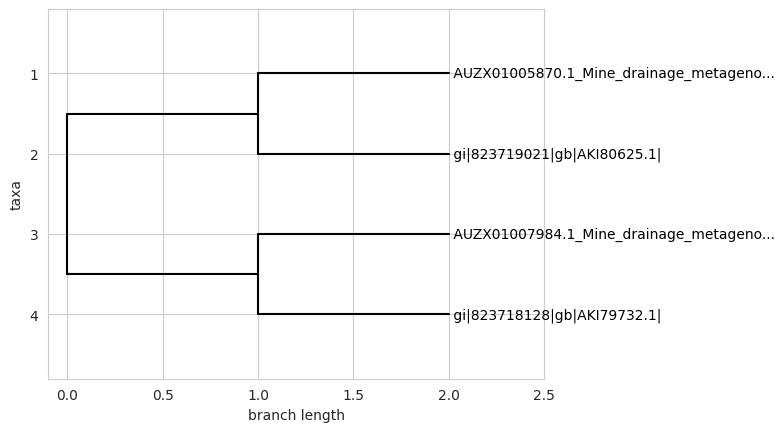

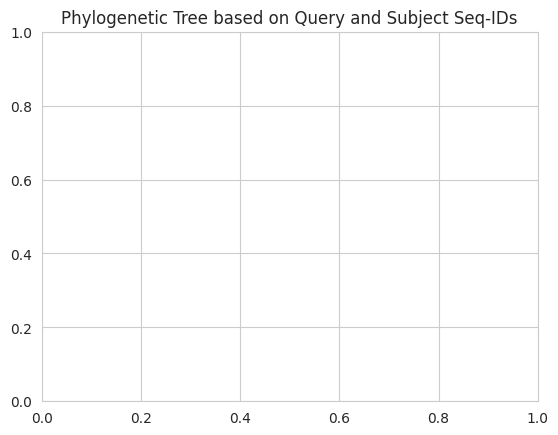

In [67]:
# Install necessary libraries if not already installed
!pip install biopython plotly

# Import required libraries
import pandas as pd
from Bio import Phylo
import matplotlib.pyplot as plt
from io import StringIO

# Step 1: Load the dataset
file_path = "12985_2018_976_MOESM2_ESM.csv"  # Ensure this file is in your working directory
df = pd.read_csv(file_path, encoding="utf-8")

# Step 2: Display dataset info
print(df.info())
print(df.head())

# Step 3: Extract unique Query and Subject Seq-IDs
query_ids = df["Query Seq-id"].unique()
subject_ids = df["Subject Seq-id"].unique()

# Step 4: Create a simple Newick tree format
tree_structure = f"(({query_ids[0]},{subject_ids[0]}),({query_ids[1]},{subject_ids[1]}));"

# Step 5: Generate and visualize the phylogenetic tree
tree = Phylo.read(StringIO(tree_structure), "newick")

plt.figure(figsize=(10, 6))
Phylo.draw(tree)
plt.title("Phylogenetic Tree based on Query and Subject Seq-IDs")
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
FASTA file created successfully!
FORCED DEBUG: Potential Problem: sequences (N=20) don't have same lengths but contain gaps, consider using --dealign
Phylogenetic tree file created successfully.


<Figure size 1200x800 with 0 Axes>

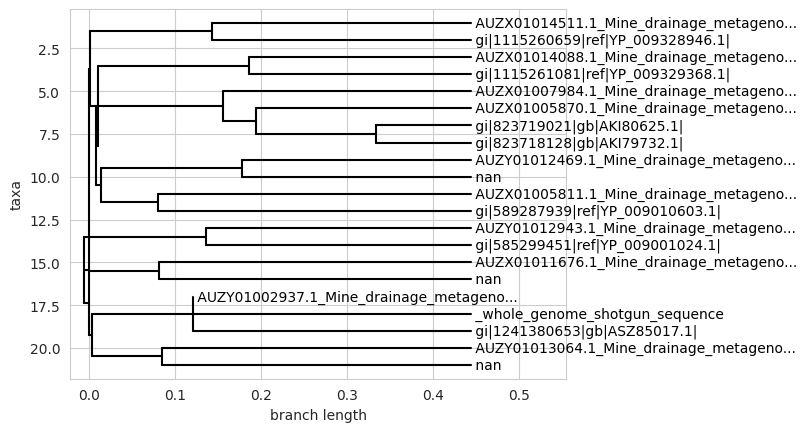

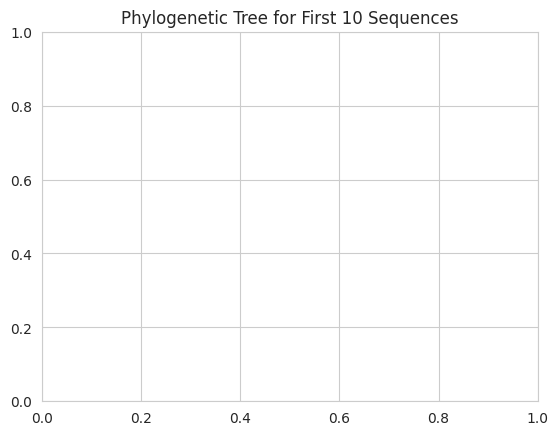

In [68]:
# Install necessary dependencies
!apt-get install -y clustalo

# Import required libraries
import pandas as pd
import os
from Bio import Phylo
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "12985_2018_976_MOESM2_ESM.csv"  # Ensure the file is in your working directory
df = pd.read_csv(file_path, encoding="utf-8")

# Step 2: Extract sequences from the first 10 rows
subset_df = df.head(10)  # Select the first 10 rows

# Step 3: Save the sequences in FASTA format
fasta_file = "sequences.fasta"
with open(fasta_file, "w") as f:
    for index, row in subset_df.iterrows():
        query_id = row["Query Seq-id"]
        subject_id = row["Subject Seq-id"]
        query_seq = row["Aligned part of query sequence"]
        subject_seq = row["Aligned part of subject sequence"]

        f.write(f">{query_id}\n{query_seq}\n")
        f.write(f">{subject_id}\n{subject_seq}\n")

print("FASTA file created successfully!")

# Step 4: Run Clustal Omega for multiple sequence alignment and tree generation
aligned_fasta = "aligned_sequences.fasta"
tree_file = "phylogenetic_tree.dnd"

!clustalo -i sequences.fasta -o aligned_sequences.fasta --force --outfmt=fasta --guidetree-out=phylogenetic_tree.dnd

# Step 5: Check if the tree file was generated
if os.path.exists(tree_file):
    print("Phylogenetic tree file created successfully.")

    # Step 6: Load and visualize the tree
    tree = Phylo.read(tree_file, "newick")

    plt.figure(figsize=(12, 8))
    Phylo.draw(tree)
    plt.title("Phylogenetic Tree for First 10 Sequences")
    plt.show()
else:
    print("Error: Phylogenetic tree file not found. Check Clustal Omega output.")


In [69]:
# Install necessary dependencies
!apt-get install -y clustalo

# Import required libraries
import pandas as pd
import os
from Bio import Phylo

# Step 1: Load the dataset
file_path = "12985_2018_976_MOESM2_ESM.csv"  # Ensure the file is in your working directory
df = pd.read_csv(file_path, encoding="utf-8")

# Step 2: Extract sequences from the first 10 rows
subset_df = df.head(10)  # Select the first 10 rows

# Step 3: Save the sequences in FASTA format
fasta_file = "sequences.fasta"
with open(fasta_file, "w") as f:
    for index, row in subset_df.iterrows():
        query_id = row["Query Seq-id"]
        subject_id = row["Subject Seq-id"]
        query_seq = row["Aligned part of query sequence"]
        subject_seq = row["Aligned part of subject sequence"]

        f.write(f">{query_id}\n{query_seq}\n")
        f.write(f">{subject_id}\n{subject_seq}\n")

print("FASTA file created successfully!")

# Step 4: Run Clustal Omega for multiple sequence alignment and tree generation
aligned_fasta = "aligned_sequences.fasta"
tree_file = "phylogenetic_tree.dnd"

!clustalo -i sequences.fasta -o aligned_sequences.fasta --force --outfmt=fasta --guidetree-out=phylogenetic_tree.dnd

# Step 5: Check if the tree file was generated
if os.path.exists(tree_file):
    print("Phylogenetic tree file created successfully.")
else:
    print("Error: Phylogenetic tree file not found. Check Clustal Omega output.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
FASTA file created successfully!
FORCED DEBUG: Potential Problem: sequences (N=20) don't have same lengths but contain gaps, consider using --dealign
Phylogenetic tree file created successfully.


In [70]:
# Install necessary dependencies
!apt-get install -y clustalo

# Import required libraries
import pandas as pd
import os
from Bio import Phylo

# Step 1: Load the dataset
file_path = "12985_2018_976_MOESM2_ESM.csv"  # Ensure the file is in your working directory
df = pd.read_csv(file_path, encoding="utf-8")

# Step 2: Extract sequences from the first 10 rows
subset_df = df.head(10)  # Select the first 10 rows

# Step 3: Save sequences in FASTA format (Ensure proper sequence format)
fasta_file = "sequences.fasta"
with open(fasta_file, "w") as f:
    for index, row in subset_df.iterrows():
        query_id = str(row["Query Seq-id"])
        subject_id = str(row["Subject Seq-id"])
        query_seq = str(row["Aligned part of query sequence"]).replace("-", "")  # Remove gaps if present
        subject_seq = str(row["Aligned part of subject sequence"]).replace("-", "")

        if query_seq and subject_seq:  # Ensure sequences are not empty
            f.write(f">{query_id}\n{query_seq}\n")
            f.write(f">{subject_id}\n{subject_seq}\n")

print("✅ FASTA file created successfully!")

# Step 4: Run Clustal Omega for multiple sequence alignment and tree generation
aligned_fasta = "aligned_sequences.fasta"
tree_file = "phylogenetic_tree.dnd"

!clustalo -i sequences.fasta -o aligned_sequences.fasta --force --outfmt=fasta --guidetree-out=phylogenetic_tree.dnd

# Step 5: Verify if the tree file was generated
if os.path.exists(tree_file):
    print("✅ Phylogenetic tree file created successfully!")

    # Optional: Load and print the tree structure (without plotting)
    tree = Phylo.read(tree_file, "newick")
    print("Tree structure:\n")
    Phylo.draw_ascii(tree)  # Display ASCII version of the tree

else:
    print("❌ Error: Phylogenetic tree file not found. Check Clustal Omega output.")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
✅ FASTA file created successfully!
✅ Phylogenetic tree file created successfully!
Tree structure:

         , AUZY01002937.1_Mine_drainage_metageno...
         |
 ________|________________________ _whole_genome_shotgun_sequence
|        |
|        |________________________ gi|1241380653|gb|ASZ85017.1|
|
|,             ___________________ AUZX01014088.1_Mine_drainage_metageno...
||____________|
||            |___________________ gi|1115261081|ref|YP_009329368.1|
||
||             ___________________ AUZY01012469.1_Mine_drainage_metageno...
 |____________|
 |            |___________________ nan
 |
_|     ____________________________ AUZX01005811.1_Mine_drainage_metageno...
 |____|
 |    |____________________________ gi|589287939|ref|YP_009010603.1|
 |
 |           ________________

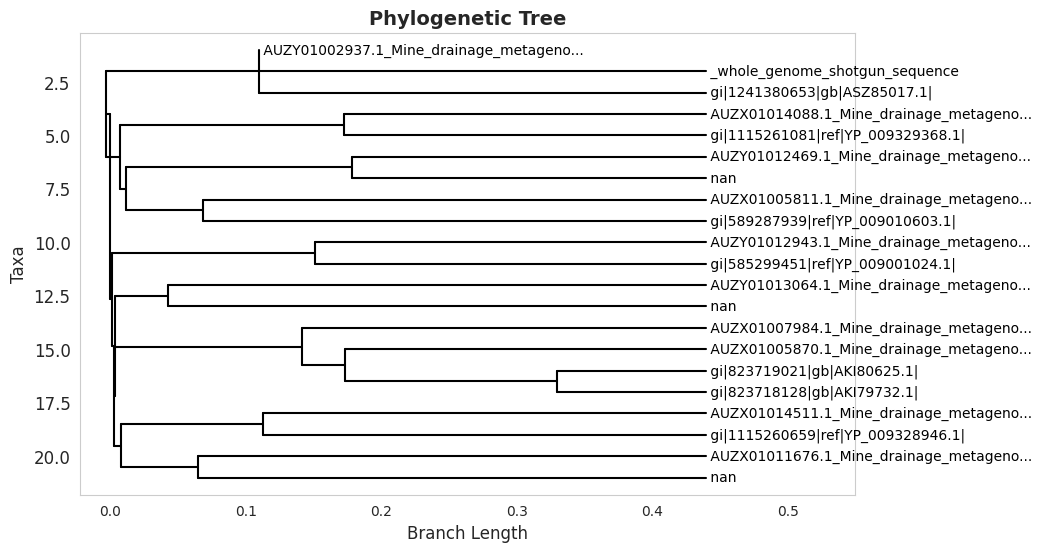

In [71]:
import matplotlib.pyplot as plt
from Bio import Phylo

# Load the phylogenetic tree from the file
tree_file = "phylogenetic_tree.dnd"
tree = Phylo.read(tree_file, "newick")

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size for better readability

# Improve visualization
Phylo.draw(
    tree,
    axes=ax,
    do_show=False
)

# Customize labels and font sizes
for text in ax.get_yticklabels():
    text.set_fontsize(12)  # Increase font size for taxa labels

# Customize line thickness
for line in ax.get_lines():
    line.set_linewidth(1.5)  # Make branch lines thicker

# Adjust layout
plt.title("Phylogenetic Tree", fontsize=14, fontweight="bold")
plt.xlabel("Branch Length", fontsize=12)
plt.ylabel("Taxa", fontsize=12)
plt.grid(False)  # Remove grid for a cleaner look

# Show the final tree
plt.show()


Tree saved as phylogenetic_tree.png


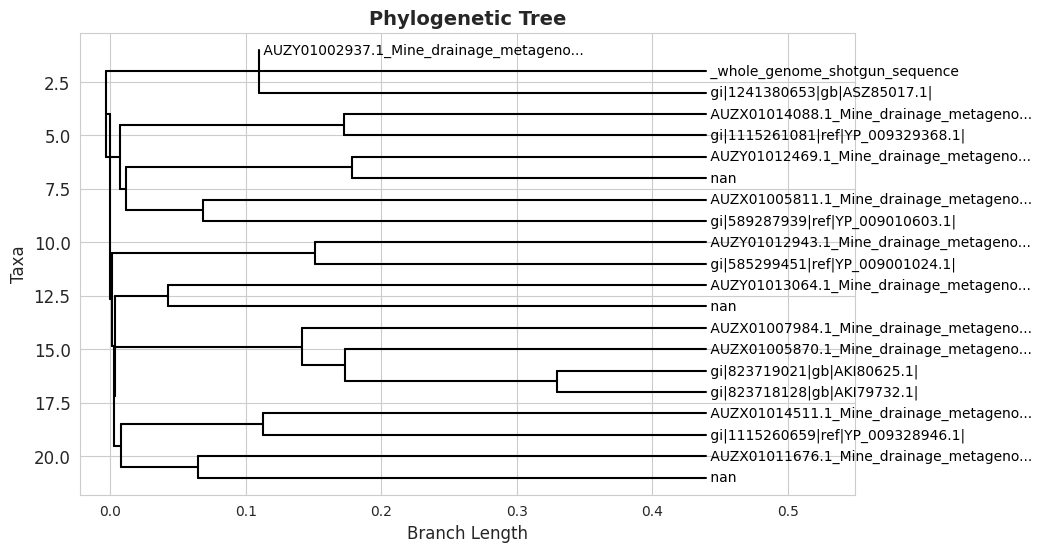

In [72]:
import matplotlib.pyplot as plt
from Bio import Phylo

# Load the phylogenetic tree from the file
tree_file = "phylogenetic_tree.dnd"
tree = Phylo.read(tree_file, "newick")

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size

# Draw the tree
Phylo.draw(
    tree,
    axes=ax,
    do_show=False
)

# Customize appearance
for text in ax.get_yticklabels():
    text.set_fontsize(12)  # Increase font size

for line in ax.get_lines():
    line.set_linewidth(1.5)  # Thicker branches

# Add labels and title
plt.title("Phylogenetic Tree", fontsize=14, fontweight="bold")
plt.xlabel("Branch Length", fontsize=12)
plt.ylabel("Taxa", fontsize=12)

# Save the tree as an image
output_file = "phylogenetic_tree.png"  # Change to .svg or .pdf if needed
plt.savefig(output_file, dpi=300, bbox_inches='tight')  # High resolution
print(f"Tree saved as {output_file}")

# Show the tree
plt.show()
